<a href="https://colab.research.google.com/github/roshan395/CPP-Standard-Template-Library-STL/blob/master/asknbid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [15]:
prices_dataset =  pd.read_csv('prices.csv', header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,05-01-2016 00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,06-01-2016 00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,07-01-2016 00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,08-01-2016 00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,11-01-2016 00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
...,...,...,...,...,...,...,...
851259,30-12-2016,ZBH,103.309998,103.199997,102.849998,103.930000,973800
851260,30-12-2016,ZION,43.070000,43.040001,42.689999,43.310001,1938100
851261,30-12-2016,ZTS,53.639999,53.529999,53.270000,53.740002,1701200
851262,30-12-2016 00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900


In [16]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

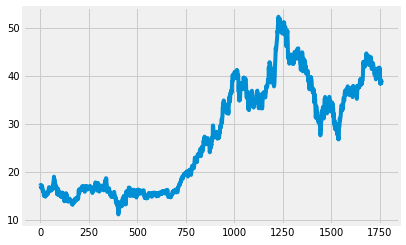

In [17]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [18]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

1409 353


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys


compilation time :  0.010162353515625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [23]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 1s 745us/step - loss: 0.1337 - val_loss: 0.2954
Epoch 2/10
1336/1336 [==============================] - 0s 58us/step - loss: 0.0695 - val_loss: 0.1355
Epoch 3/10
1336/1336 [==============================] - 0s 56us/step - loss: 0.0392 - val_loss: 0.0589
Epoch 4/10
1336/1336 [==============================] - 0s 55us/step - loss: 0.0278 - val_loss: 0.0361
Epoch 5/10
1336/1336 [==============================] - 0s 57us/step - loss: 0.0168 - val_loss: 0.0133
Epoch 6/10
1336/1336 [==============================] - 0s 53us/step - loss: 0.0083 - val_loss: 0.0058
Epoch 7/10
1336/1336 [==============================] - 0s 54us/step - loss: 0.0032 - val_loss: 3.4953e-04
Epoch 8/10
1336/1336 [==============================] - 0s 60us/step - loss: 0.0020 - val_loss: 8.4401e-04
Epoch 9/10
1336/1336 [==============================] - 0s 60us/step - loss: 0.0019 - val_loss: 6.9014e-04
Epoch 10/10
13

[[0.6331416]]
[[1.6066227]]
[[4.097013]]
[[9.762697]]
[[14.976354]]
[[ 37.22608 ]
 [ 77.411385]
 [180.21469 ]
 [414.09412 ]
 [629.31384 ]]


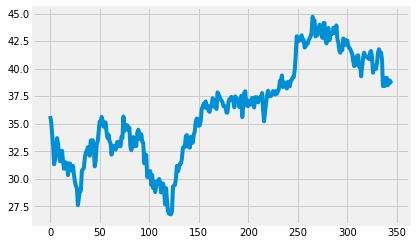

In [24]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)